# CONTEXT

* [1. Importing Packages and Collecting Data](#1)
* [2.Variable Description, Identification, and Correction](#2)
* [3. Checking the Assumption](#3)
  * [3.1 Linearity and Outliers Treatment](#3.1)
  * [3.2 Imputing Missing Variables](#3.2)
  * [3.3 Normality And Transformation of Distributions](#3.3)
* [4. Feature Engineering](#4)
  * [4.1 Feature Scaling](#4.1)
  * [4.2 Encoding Categorical Variables](#4.2)
    * [4.2.1 Manually Label Encoding](#4.2.1)
    * [4.2.2 One Hot Encoding](#4.2.2)
 * [5. Model Building and Evaluation](#5)
   * [5.1 Model Training](#5.1)
   * [5.2 Model Evaluation](#5.2)
     * [5.2.1 K-Fold Cross Validation](#5.2.1)
     * [5.2.2 Optimization of Hyperparameters](#5.2.2)
     * [5.2.3 Retrain and Predict Using Best Hyperparameters](#5.2.3)

# 1. Importing Packages and Collecting Data <a id="1"></a>

In [64]:
'''Importing Data Manipulattion Moduls'''
import numpy as np
import pandas as pd

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

'''plotly Visualization'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [65]:
'''Read in train and test data from csv files'''
train = pd.read_csv('C:\\Users\\SITS\\Videos\\XGBoost\\train.csv')
test = pd.read_csv('C:\\Users\\SITS\\Videos\\XGBoost\\test.csv')

# 2.Variable Description, Identification, and Correction <a id="2"></a>

In [3]:
'''Train and test data at a glance'''
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [67]:
'''Dimensions of train and test data'''
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


In [68]:
"""Let's check the columns names"""
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

**For delailed variable description please check out [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)**

#### So what can we see till now.
* we have total 81 variables for train and 80 for test variable
* we don't have *SalePrice* variable for test variable because this will be our task to infer *SalePrice* for test set by learning from train set.
* So *SalePrice* is our target variable and rest of the variables are our predictor variables.

In [69]:
"""Let's merge the train and test data and inspect the data type"""
merged = pd.concat([train, test], axis=0, sort=True)
display(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      26
float64    12
dtype: int64

Dimensions of data: (2919, 81)


In [70]:
'''Extracting numerical variables first'''
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))
print('\n')
display(num_merged.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

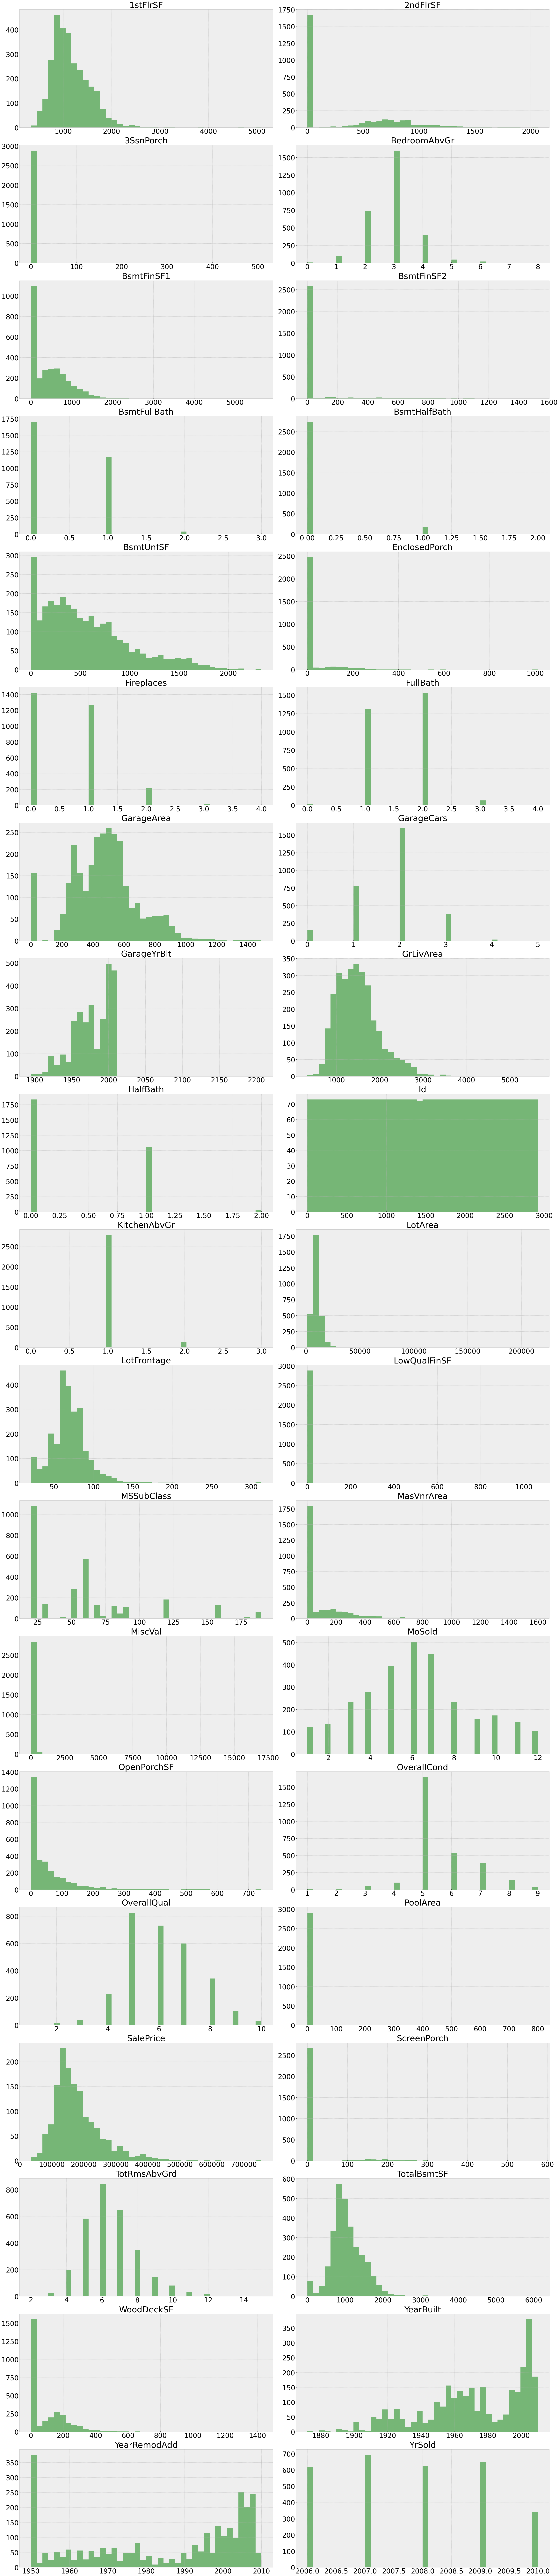

In [9]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_merged, num_merged.columns, 19, 2)

**Now we can clearly see distribution so numerical variable, we find that:**
* There are two type of numerical  variable in this data continuous (like LotFrontage, LotArea, and YearBuilt) 
* and some are discrete (like MSSubClass, OverallQual, OverallCond, BsmtFullBath, and HalfBath etc.)
* some variables are actually categorical (like like MSSubClass, OverallQual, and OverallCond). *For detailed data documentation see data_description.txt

In [71]:
'''Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [72]:
'''Check out the data type after correction'''
merged.dtypes.value_counts()

object     48
int64      21
float64    12
dtype: int64

### Create 3 functions for different Plotly plots.
we are going use plotly plots broadly in the notebook therefore  I would like to create functions for different Plotly plots.

In [73]:
'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x,
                        y = y,
                        mode = 'markers',
                        marker = dict(color = y, size=size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(x = x,
                   y = y,
                   marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot histogram'''
def histogram_plot(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# 3. Checking the Assumption <a id="3"></a>

According to Hair et al. (2013), four assumptions should be tested:

* **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* **Absence of correlated errors(Multicollineraty)** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Correlation Matrix 

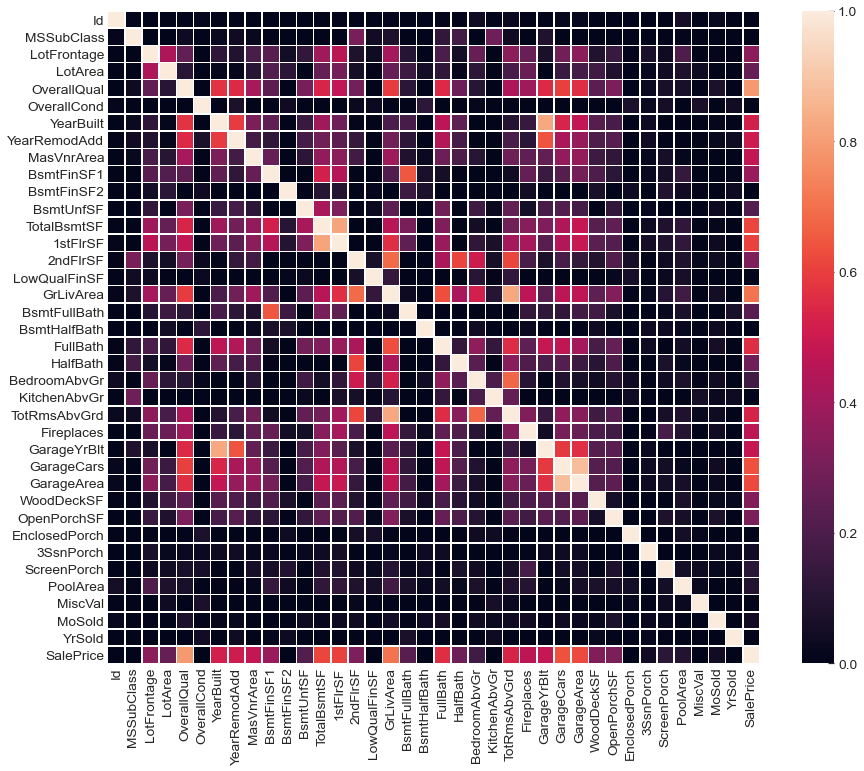

In [74]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

At the first sight light orange colored squares that get my attention, showing strong correlation between 'SalePrice' (depended variable) and  'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF' 'GarageArea' etc( Independed variable).

#### 'SalePrice' correlation matrix

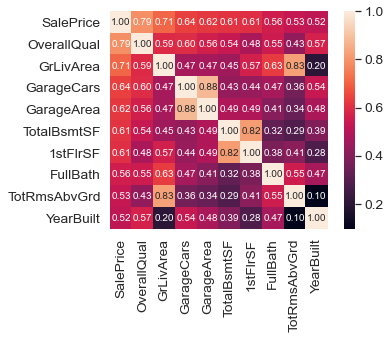

In [75]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**These are the variables most correlated with 'SalePrice'. My thoughts on this:**

 * 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
 
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

***<font color=blue>we concluded that the following variables can play an important role in this problem:***</font>

* OverallQual
* GarageCars
* YearBuilt
* FullBath
* TotalBsmtSF.
* GrLivArea.

## 3.1 Linearity and Outliers Treatment <a id="3.1"></a>
The best way to check linear relationship is to plot scatter diagram.
As well as we also treat the outliers.

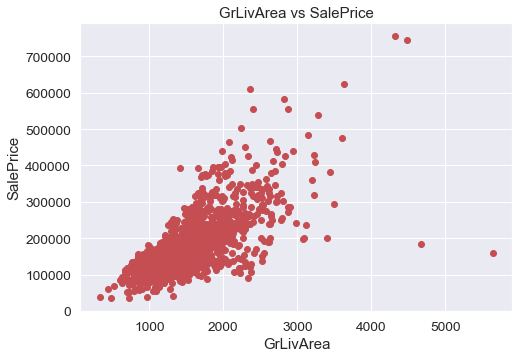

In [77]:
'''Sactter plot of GrLivArea vs SalePrice.'''
#scatter_plot(train.GrLivArea, train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(train.GrLivArea, train.SalePrice, color='r')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
ax.set_title('GrLivArea vs SalePrice')
plt.show()

*Great!!... It seems that 'SalePrice' and 'GrLivArea' showing the* **linear relationship.**

***Outliers Treatment*** 

In [78]:
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [18]:
'''Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(train.GrLivArea, train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [19]:
'''Scatter plot of TotalBsmtSF Vs SalePrice'''
scatter_plot(train.TotalBsmtSF, train.SalePrice, 'TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

*'TotalBsmt' and 'SalePrice' also showing **linear relationship**.It seems that at zero Total square feet of basement area there is the some sale price of the house.*

***Outliers treatment***

In [20]:
'''Drop observations where TotlaBsmtSF is greater than 3000 sq.ft'''
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [21]:
'''Scatter plot of TotalBsmtSF Vs SalePrice'''
scatter_plot(train.TotalBsmtSF, train.SalePrice, 'TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

In [22]:
'''Scatter plot of YearBuilt Vs SalePrice'''
scatter_plot(train.YearBuilt, np.log1p(train.SalePrice), 'YearBuilt Vs SalePrice', 'YearBuilt', 'SalePrice', 10, 'viridis')

*Okay!!!...we observed that as year is passing, sale price  of the house also increase, showing* ***linear relationship.***

**Note:** we don't know if SalePrice is affected by inflation or not.

***Outliers Treatment***

In [23]:
'''Drop observations where YearBulit is less than 1893 sq.ft'''
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [24]:
'''Scatter plot of YearBuilt Vs SalePrice'''
scatter_plot(train.YearBuilt, np.log1p(train.SalePrice), 'YearBuilt Vs SalePrice', 'YearBuilt', 'SalePrice', 10, 'viridis')

In [25]:
'''Scatter plot of GarageCars Vs SalePrice'''
scatter_plot(train.GarageCars, np.log(train.SalePrice), 'GarageCars Vs SalePrice', 'GarageCars', 'SalePrice', 10, 'Electric')

***We transform the Saleprice in log transformation for more clear linear relationship.***

In [26]:
'''Scatter plot of GarageCars Vs SalePrice'''
scatter_plot(train.OverallQual, np.log(train.SalePrice), 'OverallQual Vs SalePrice', 'OverallQual', 'SalePrice', 10, 'Bluered')

***Ahh!!!...Showing linear relationship***

In [27]:
'''Scatter plot of FullBath Vs SalePrice'''
scatter_plot(train.FullBath, np.log(train.SalePrice), 'FullBath Vs SalePrice', 'FullBath', 'SalePrice', 10, 'RdBu')

***Linear relationship. Nice!!...***

**In summary**

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual', FullBath and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual'.

## 3.2 Imputing Missing Variables <a id="3.2"></a>
The simpliest way to impute missing values of a variable is to impute its missing values with its mean, median or mode depending on its distribution and variable type(categorical or numerical). By now, we should have a idea about the distribution of the variables and the presence of outliers in those variables. For categorical variables mode-imputation is performed and for numerical variable mean-impuation is performed if its distribution is symmetric(or almost symmetric or normal like Age). On the other hand, for a variable with skewed distribution and outliers, meadian-imputation is recommended as median is more immune to outliers than mean.

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant. So simply replacing missing values with the mean or the median might not be the best solution since missing values may differ by groups and categories. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median to impute the missing values of a variable.

In [28]:
'''separate our target variable first'''
y_train = train.SalePrice

'''Drop SalePrice from train data.'''
train.drop('SalePrice', axis = 1, inplace = True)

'''Now combine train and test data frame together.'''
df_merged = pd.concat([train, test], axis = 0)

'''Dimensions of new data frame'''
df_merged.shape

(2897, 80)

In [29]:
'''Again convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

In [30]:
'''columns with missing observation'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values
'''Number of columns with missing obervation'''
total_missing_columns = np.count_nonzero(df_merged.isnull().sum())
print('We have ' , total_missing_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have  34 features with missing values and those features (with missing values) are: 

 ['MSZoning' 'LotFrontage' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Electrical' 'BsmtFullBath' 'BsmtHalfBath' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageYrBlt' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence'
 'MiscFeature' 'SaleType']


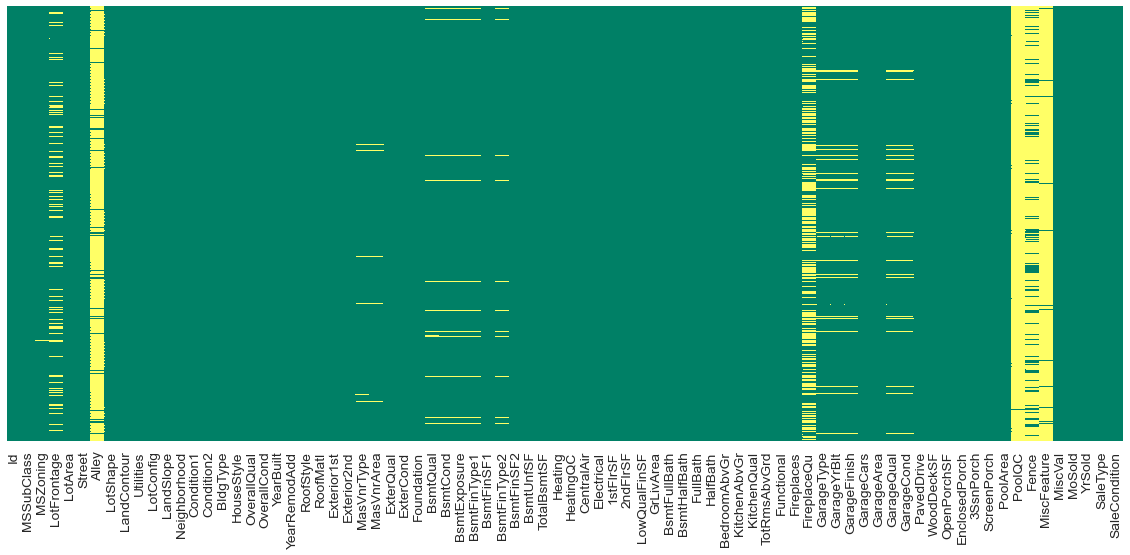

In [31]:
'''Simple visualization of missing variables'''
plt.figure(figsize=(20,8))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [32]:
'''Get and plot only the features (with missing values) and their corresponding missing values.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
x = missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, 'Features Having Missing Observations','Missing Values', 20, 'Viridis')

In [33]:
missing_columns

MSZoning           4
LotFrontage      485
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      79
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1410
GarageType       155
GarageYrBlt      157
GarageFinish     157
GarageCars         1
GarageArea         1
GarageQual       157
GarageCond       157
PoolQC          2889
Fence           2331
MiscFeature     2793
SaleType           1
dtype: int64

**Variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu have most missing variables**. Usually we drop a variable if at least 40% of its values are missing. Hence, one might tempt to drop variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu. Deleting these variables would be a blunder because data description tells these 'NaN' has some purpose for those variables. Like 'NaN' in PoolQC refers to 'No Pool', 'NaN' in MiscFeature refers to 'None', and 'NaN' in Alley means 'No alley access' etc. More generally NaN means the absent of that variable. Hence we gonna replace NaN with 'None' in those variable. Please do read data [description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt) carefully.

In [34]:
'''Impute by None where NaN means something.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [35]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [36]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

**'LotFrontage' is remain to impute becuase:**
Almost 17% observations of LotFrontage are missing in. Hence, simply imputing LotFrontage by mean or median might introduce bias since the amount of missing values is significant. Again LotFrontage may differ by different categories of house. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median LotFrontage to impute the missing values of it. This method may result in better accuracy without high bias, unless a missing value is expected to have a very high variance.

In [37]:
'''We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical.'''
df = df_merged.drop(columns=['Id','LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,617,1,1,3,3,0,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,892,1,1,3,3,0,2,0,...,0,0,3,4,1,0,4,1,8,4


In [38]:
 # Inserting Age in variable correlation.
df['LotFrontage'] = df_merged['LotFrontage']
# Move Age at index 0.
df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,617,1,1,3,3,0,4,...,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,892,1,1,3,3,0,2,...,0,0,3,4,1,0,4,1,8,4


In [39]:
'''correlation of df'''
corr = df.corr()
display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
LotArea        0.639965
1stFlrSF       0.420257
GarageArea     0.360497
GrLivArea      0.347875
Name: LotFrontage, dtype: float64

LotConfig    -0.191054
GarageType   -0.295651
MSSubClass   -0.398100
BldgType     -0.486039
Utilities          NaN
Name: LotFrontage, dtype: float64

***Only 'BldgType' categorical variable has the highest correlation with LotFrontage***

In [40]:
'''Impute LotFrontage with median of respective columns (i.e., BldgType)'''
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [41]:
'''Is there any missing values left untreated??'''
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


## 3.3 Normality And Transformation of Distributions <a id="3.3"></a>
Normal distribution (bell-shaped) of variables is not only one of the assumptions of regression problems but also a assumption of parametric test (like one-way-anova, t-test etc) and pearson correlation. But in practice, this can not be met perfectly and hence some deviation off this assumption is acceptable. In this section, we would try to make the skewed distribution as normal as possible. Since most of the variables are positively skewed, we would apply log transformation on them. **Let's observe our target variable separately:**

If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [42]:
'''Skewness and Kurtosis of SalePrice'''
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 1.529700
Kurtosis: 3.801796


In [43]:
'''Plot the distribution of SalePrice with skewness.'''
histogram_plot(y_train, 'SalePrice without Transformation', 'Abs Frequency', 'deepskyblue')

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*

In [44]:
'''Plot the distribution of SalePrice with skewness'''
y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
histogram_plot(y_train, title, 'Abs Frequency', ' darksalmon')

In [45]:
'''Now calculate the rest of the explanetory variables'''
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

,Skewness
MiscVal,21.881799
PoolArea,18.653165
LotArea,13.135552
LowQualFinSF,12.515094
3SsnPorch,11.338027
KitchenAbvGr,4.250236
BsmtFinSF2,4.153746
EnclosedPorch,4.066188
ScreenPorch,3.930502
BsmtHalfBath,3.930474


In [46]:
''' plot the skewness for rest of the explanetory variables'''
bar_plot(skew_num_sorted.index, skew_num_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Blackbody')

In [47]:
'''Extract numeric variables merged data.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [48]:
'''Make the tranformation of the explanetory variables'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])


#Normal variables
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
#Merging
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [49]:
'''Update numerical variables with transformed variables.'''
df_merged_num.update(df_merged_num_all)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 4. Feature Engineering <a id="4"></a>

## 4.1 Feature Scaling <a id="4.1"></a>
In sklearn we have various method like from MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler,Normalizer, QuantileTransformer, PowerTransformer. **For more see the [documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)**

Usually well known for rescaling data, i.e., normalization and standarization. Normalization scales all numeric variables in the range [0,1]. So outliers might be lost. On the other hand, standarization transforms data to have zero mean and unit variance.

Feature scaling helps gradient descent converge faster, thus reducing training time. Its not necessary to standarize the target variable. However, due to the presence of outliers, we would use sklearn's RobustScaler since it is not affected by outliers.

In [50]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Creating scaler object.'''
scaler = RobustScaler()

'''Fit scaler object on train data.'''
scaler.fit(df_merged_num)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = scaler.transform(df_merged_num)

In [51]:
'''Retrive column names'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.


## 4.2 Encoding Categorical Variables <a id="4.2"></a>
We have to encode categorical variables for our machine learning algorithms to interpret them. We would use label encoding and then one hot encoding.

### 4.2.1 Manually Label Encoding <a id="4.2.1"></a>
We would like to encode some categorical (ordinal) variables to preserve their ordinality. If we use sklearn's label encoder, it will randomly encode these ordinal variables and therefore ordinality would be lost. To overcome this, we will use pandas replace method to manually encode orninal variables. ***Variables like LotShape, LandContour, Utilities, LandSlope, OverallQual (already encoded), OverallCond (already encoded), ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, BsmtFinType2, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence have inherent orders. Let's encode them. Don't get bored if you fell exhausted in the process.***

**Manuall Work - go to data_depciption.txt > Ctrl+f > find the variable > start labeling**

In [52]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding of ordinal variable"""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [53]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

* ### 4.2.2 One Hot Encoding <a id="4.2.2"></a>
Categorical variables without any inherent order will be converted into numerical for our model using pandas get_dummies method.

In [54]:
'''Now selecting the nominal vaiables for one hot encording'''
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

"""Let's get the dummies variable"""
df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

In [55]:
"""Let's concat one hot encoded and label encoded variable together"""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)

'''Finally join processed categorical and numerical variables'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis=1)

'''Dimensions of new data frame'''
df_merged_processed.shape

(2897, 224)

In [56]:
'''Now retrive train and test data for modelling.'''
df_train_final = df_merged_processed.iloc[0:1438, :]
df_test_final = df_merged_processed.iloc[1438:, :]

'''And we have our target variable as y_train.'''
y_train = y_train

In [57]:
'''Updated train data'''
df_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,4,2,6,0,2,3,3,2,0,0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,4,1,6,3,2,3,3,2,0,0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,4,2,6,3,2,3,3,2,0,0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,4,2,6,4,1,3,3,2,0,0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,4,2,6,3,2,3,3,2,0,0


In [58]:
'''Updated test data'''
df_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,4,2,6,0,2,3,3,2,0,0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,4,1,6,3,2,3,3,2,0,0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,4,2,6,3,2,3,3,2,0,0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,4,2,6,4,1,3,3,2,0,0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,4,2,6,3,2,3,3,2,0,0


# 5. Model Building and Evaluation <a id="5"></a>
With all the preprocessings done and dusted, we're ready to train our regression models with the processed data.

In [59]:
"""Let's have a final look at data dimension"""
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:', y_train.shape)
print('Test data dimension:', df_test_final.shape)

Input matrix dimension: (1438, 224)
Output vector dimension: (1438,)
Test data dimension: (1459, 224)


![](http://)## 5.1 Model Traing <a id="5.1"></a>

In [79]:
'''set a seed for reproducibility'''
seed = 44

'''Initialize all the regesssion models object we are interested in'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

''''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
lr = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
kr = KernelRidge()
dt = DecisionTreeRegressor(random_state = seed)
svr = SVR()
knn = KNeighborsRegressor(n_jobs= -1)
pls = PLSRegression()
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(n_jobs = -1, random_state = seed)
lgb = LGBMRegressor(n_jobs = -1, random_state = seed)

In [80]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def train_r2(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

'''Calculate and plot the training accuracy.'''
models = [lr, lasso, ridge, elnt, kr, dt, svr, knn, pls, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))

'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'LASSO',  'RIDGE', 'ELNT', 'KR', 'DT', 'SVR', 'KNN', 'PLS', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models', '% Training Score', 30, 'Rainbow')

***Being a regression problem, score method returns r_squared(coefficients of determination) and hence bigger is better. Looks like DT and ET have exactly r2_score of 100%. Usually higher r2_score is better but r2_score very close to 1 might indicate overfitting. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.***

* ## 5.2 Model Evaluation <a id="5.2"></a>
So basically, to evaluate a model's performance, we need some data (input) for which we know the ground truth(label). For this problem, we don't know the ground truth for the test set but we do know for the train set. So the idea is to train and evaluate the model performance on different data. One thing we can do is to split the train set in two groups, usually in 80:20 ratio. That means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. Then we can compare our model prediction with this ground truth (for 20% data). That's how we can tell how our model would perform on unseen data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that. Let's evaluate our model using train_test_split method. **Note: From now on, we will be using root mean squared error (that is, the average squared difference between the estimated values and the actual value) as the evaluation metric for this problem. So smaller is better.**

In [81]:
'''Evaluate model on the hold set'''
def train_test_split(model):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse) #non-negative square-root
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [lasso, ridge, elnt, kr, dt, svr, knn, pls, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split(model))
    
'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LASSO',  'RIDGE', 'ELNT', 'KR', 'DT', 'SVR', 'KNN', 'PLS', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
scatter_plot(train_test_score.index, train_test_score['Train_Test_RMSE'], "Models' Test Score (RMSE) on Holdout(30%) Set", 'Models', 'RMSE', 30, 'plotly3')

**Being root mean squared error, smaller is better. Looks like, RIDGE (0.114) is the best regression model followed by SVR(0.118), GB(0.123) and XGB(0.121). Unfortunately, LR(11.02) can't find any linear pattern, hence it performs worst and hence discarded.**

However, train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. To overcome this we can use a technique called **cross validation** where all the data is used for training and testing periodically. Thus we may reduce the bias introduced by train_test_split. From different cross validation methods, we would use **k-fold cross validation.** In sklearn we have a method cross_val_score for calculating k-fold cross validation score.

### 5.2.1 K-Fold Cross Validation <a id="5.2.1"></a>
K-Fold is a popular and easy to understand, it generally results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.
![](http://analytics.georgetown.edu/sites/gradanalytics/files/styles/georgetown_thumbnail/public/osvald_0.jpg)

Let's say we will use 10-fold cross validation. So k = 10 and we have total 1438 observations. Each fold would have 1438/10 = 143.8 observations. So basically k-fold cross validation uses fold-1 (143.8 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.






In [82]:
'''Function to compute cross validation scores.'''
def cross_validation(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, df_train_final, y_train, cv=10, n_jobs= -1, scoring = 'neg_mean_squared_error')
    sq_val_score = np.sqrt(-1*val_score)
    r_val_score = np.round(sq_val_score, 5)
    return r_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, elnt, kr, dt, svr, knn, pls, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validation(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns=['Cross_Val_Score(RMSE)'])
x_val_score.index = ['LASSO',  'RIDGE', 'ELNT', 'KR', 'DT', 'SVR', 'KNN', 'PLS', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
scatter_plot(x_val_score.index, x_val_score['Cross_Val_Score(RMSE)'], "Models' 10-fold Cross Validation Scores (RMSE)", 'Models', 'RMSE', 30, 'cividis')

**Again Ridge (0.114) has managed to beat SVM(0.116) as the best regression model on 10-fold cross validation. And rmse of GB, XGB, and LGB have also dropped from previous holdout set's rmse.**

### 5.2.2 Optimization of Hyperparameters <a id="5.2.2"></a>
Let's start optimizing Hyperparameters of the models.

For optimization we used Grid Search to all the models with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.

I choose only 7 models because **optimizing hyperparameters is time consuming** and but I like to would encourage you to optimize all the models.

In [83]:
'''Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    '''Construct grid search object with 10 fold cross validation.'''
    grid = GridSearchCV(model, param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(df_train_final, y_train)
    best_params = grid.best_params_ 
    best_score = np.round(np.sqrt(-1 * grid.best_score_), 5)
    return best_params, best_score

#### 5.2.2.1 Optimize Ridge
Model parameter description [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [84]:
'''Difine hyperparameters of ridge'''
ridge_param_grid = {'alpha':[0.5, 2.5, 3.3, 5, 5.5, 7, 9, 9.5, 9.52, 9.64, 9.7, 9.8, 9.9, 10, 10.5,10.62,10.85, 20, 30],
                    'random_state':[seed]}
tune_hyperparameters(ridge, ridge_param_grid)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.3s


Ridge best params:{'alpha': 10.62, 'random_state': 44} & best_score:0.11338


[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    2.9s finished


#### 5.2.2.2 Optimize Lasso
Model parameter desription [Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [85]:
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

tune_hyperparameters(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.3s


Lasso best params:{'alpha': 0.0002, 'random_state': 44} & best_score:0.11244


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.6s finished


#### 5.2.2.3 Optimize KernelRidge
 Model Parameters description [here](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

In [86]:
KernelRidge_param_grid = {'alpha':[0.1, 0.15, 0.23, 0.25, 0.3,1],
                          'kernel': ['linear', 'polynomial'],
                          'degree': [2,3],
                          'coef0': [1.5,2,3]}
tune_hyperparameters(kr, KernelRidge_param_grid)
kr_best_params, kr_best_score = best_params, best_score
print('Kernel Ridge best params:{} & best_score: {:0.5f}'. format(kr_best_params, kr_best_score))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.3min finished


Kernel Ridge best params:{'alpha': 0.25, 'coef0': 3, 'degree': 2, 'kernel': 'polynomial'} & best_score: 0.11011


#### 5.2.2.4 Optimize Elastic Net
Model parameter description [Here]()

In [87]:
elastic_params_grid = {'alpha': [0.0001,0.0002, 0.0003, 0.01,0.1,2], 
                 'l1_ratio': [0.2, 0.85, 0.95,0.98,10],
                 'random_state':[seed]}
tune_hyperparameters(elnt, elastic_params_grid)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   12.4s


Elastic Net best params:{'alpha': 0.0002, 'l1_ratio': 0.98, 'random_state': 44} & best_score:0.11244


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.7s finished


#### 5.2.2.5 Optimize Support Vector Regression
Model parameters desciption [Here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [88]:
svr_params_grid = {'kernel':['linear', 'poly', 'rbf'],
                   'C':[2,4,5],
                   'gamma':[0.01,0.001,0.0001]}
tune_hyperparameters(svr, svr_params_grid)
svr_best_params, svr_best_score = best_params, best_score
print('SVR best params:{} & best_score:{:0.5f}' .format(svr_best_params, svr_best_score))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 19.1min finished


SVR best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11308


#### 5.2.2.6 Optimize Random Forest Regressor
Model parameters desciption [Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [89]:
rf_params_grid = {'n_estimators':[1,5,50,100],
                   'max_depth':[1,2],
                   'min_samples_split':[3,4],
                   'min_samples_leaf':[2,4],
                   'random_state':[seed]}
tune_hyperparameters(rf, rf_params_grid)
rf_best_params, rf_best_score = best_params, best_score
print('RF best params:{} & best_score:{:0.5f}' .format(rf_best_params, rf_best_score))

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   47.2s finished


RF best params:{'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 44} & best_score:0.23131


#### 5.2.2.7 Optimize XGboost Regressor
Model parameters description [Here](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [90]:
xgb_params_grid = {'min_child_weight': [5, 10],
                   'gamma': [0.04, 0.1, 1.5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.46, 1.0],
                   'max_depth': [3, 4]}
xgb_opt = XGBRegressor(learning_rate = 0.03, reg_alpha = 0.4640, reg_lambda = 0.8571, n_estimators = 1000, 
                       silent = 1, nthread = -1, random_state = 101)

tune_hyperparameters(xgb_opt, xgb_params_grid)
xgb_best_params, xgb_best_score = best_params, best_score
print('XGB best params:{} & best_score:{:0.5f}' .format(xgb_best_params, xgb_best_score))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 88.5min finished


[18:04:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB best params:{'colsample_bytree': 0.46, 'gamma': 0.04, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} & best_score:0.11530


***NOTE: For computational restrictions and time limit, I won't optimize gb and lgb models. I also reckon some models like DT, KNN won't do any better after optimization since they have poor cross validation scores. If you have resources and time, I would encourage you to try to optimize these models yourself and see how they perform.***

In [91]:
'''Not Optimize Randomly choosen parameters'''
'''Hyperparameters of gb'''
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)
'''Hyperparameters of lgb'''
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
'''We can assume these 2 model best score is equal to cross validation scores.
Thought it might not be precise, but I will take it'''
gb_best_score = cross_validation(gb_opt)
lgb_best_score = cross_validation(lgb_opt)

In [92]:
"""Let's plot the models' rmse after optimization."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([lasso_best_score, ridge_best_score, kr_best_score, 
                  elastic_best_score, svr_best_score, rf_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)})
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'SVM', 'RF', 'XGB', 'GB', 'LGB']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')

### 5.2.3 Retrain and Predict Using Best Hyperparameters <a id="5.2.3"></a>
Now we would like to retrain our models using the best parameters responsible for best rmse after optimization. Then we would predict on test data to see how different models perform on leaderboard.

In [93]:
'''Initialize 9 object models with best hyperparameters'''
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kr_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
rf_opt = RandomForestRegressor(**rf_best_params)
svm_opt = SVR(**svr_best_params)
xgb_opt = XGBRegressor(**xgb_best_params)
gb_opt = gb_opt
lgb_opt = lgb_opt

In [94]:
'''Now train and predict with optimized models'''
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= test.Id
    submission['SalePrice'] = y_pred
    return submission

'''Make submission with optimized lasso, ridge, kernel_ridge, elastic_net and svm, xgb, gb, and lgb.'''
predict_with_optimized_models(lasso_opt).to_csv('lasso_optimized.csv', index = False)
predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)
predict_with_optimized_models(kernel_ridge_opt).to_csv('kernel_ridge_optimized.csv', index = False)
predict_with_optimized_models(elastic_net_opt).to_csv('elastic_net_optimized.csv', index = False)
predict_with_optimized_models(rf_opt).to_csv('rf_opt_optimized.csv', index = False)
predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)
predict_with_optimized_models(xgb_opt).to_csv('xgb_optimized.csv', index = False)
predict_with_optimized_models(gb_opt).to_csv('gb_optimized.csv', index = False)
predict_with_optimized_models(lgb_opt).to_csv('lgb_optimized.csv', index = False)